<font size=4 color='Orange'>Faulty Steel Plates EDA

Data Source: https://www.kaggle.com/uciml/faulty-steel-plates <br>
Note: No information about the variables is provided except that last 7 variables are 7 different target variables

Importing Libraries

In [369]:
import pandas as pd #To read and edit tabular data
import numpy as np #To perform array/matrix operations
import math #For mathematical opeartions
import matplotlib.pyplot as plt #To perform plotting
%matplotlib inline
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')
import warnings #To ignore warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [318]:
steel_data = pd.read_csv("faults.csv")
steel_data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


Checking the info()

In [319]:
steel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

<font size=2.5 color='olive'>__Initial Observations:__
1. There are total 1941 data points and 34 features
2. Out of 34, 27 of them are independent features and other 7 are predictor/dependent variables
3. We have a Multi-Class Classification Problem

<font size=3.5 color='darkblue'>All the target features are in the form of one hot encoding, we need convert all 7 columns into 1 single column as 'Fault'

In [320]:
#Taking all the target columns into new dataframe
target_columns = steel_data.columns[-7:]
target_data = steel_data[target_columns]
target_data.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [321]:
#Checking if each data point belongs to only one class
total = 0
for column in target_columns:
    total += target_data[column].value_counts()[1]
print('Does each data point belongs to only one class: ', total==target_data.shape[0])

Does each data point belongs to only one class:  True


In [322]:
#Reversing one hot encoding
def get_fault(row):
    for c in target_data.columns:
        if row[c]==1:
            return c

target = target_data.apply(get_fault, axis=1)
        
#https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas

In [323]:
target.value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
dtype: int64

In [324]:
for column in target_data.columns:
    print(column, ':', target_data[column].value_counts()[1])

Pastry : 158
Z_Scratch : 190
K_Scatch : 391
Stains : 72
Dirtiness : 55
Bumps : 402
Other_Faults : 673


<font size=2.5 color='olive'>__Observation:__ 'target' variable has exact data as before 

<font size=3.5 color='darkblue'>We have to create a new 'fault' column in the 'steel_data' and drop the 7 faulty columns

In [325]:
#dropping the previous 7 fault columns
steel_data.drop(target_columns, axis=1, inplace=True)

In [326]:
#Creating new 'target' column
steel_data['Fault'] = target

In [328]:
steel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

<font size=2.5 color='olive'>__Observation:__ Now our data frame contains only 28 variables as we converted 7 target columns into one 'Fault' column

<font size=2 color='teal'>As the 'Fault' column is an object type, we will convert that into numeric by using below dictionary <br>Label_Dict = {'Pastry' : 1, 'Z_Scratch' : 2, 'K_Scratch' : 3, 'Stains' : 4, 'Dirtiness' : 5, 'Bumps' : 6, 'Other_Faults' : 7}

In [329]:
Fault_encod_dict = {'Pastry' : 1, 'Z_Scratch' : 2, 'K_Scatch' : 3, 'Stains' : 4,
              'Dirtiness' : 5, 'Bumps' : 6, 'Other_Faults' : 7} 
def encod_fault(fault):
    return Fault_encod_dict[fault]

In [330]:
#Converting
steel_data['Fault'] = steel_data['Fault'].apply(lambda x : encod_fault(x))

<AxesSubplot:xlabel='Fault', ylabel='count'>

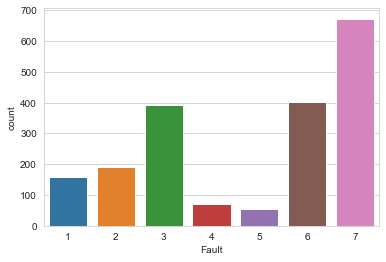

In [331]:
sns.countplot(steel_data['Fault'])

<font size=2.5 color='olive'>__Observation:__ 
1. Target variable has encoded according to the dictionary and the data is matching with before
2. We have a case of Imbalanced Dataset

<font size=3.5 color='darkblue'>Plotting Heatmap on correlation between features

<font size=2 color='teal'>Let's check the correlation with 10 columns at a time

In [332]:
#taking all column names into a variable
column_names = steel_data.columns

<font size=2.5 color='darkblue'>Columns 1-10

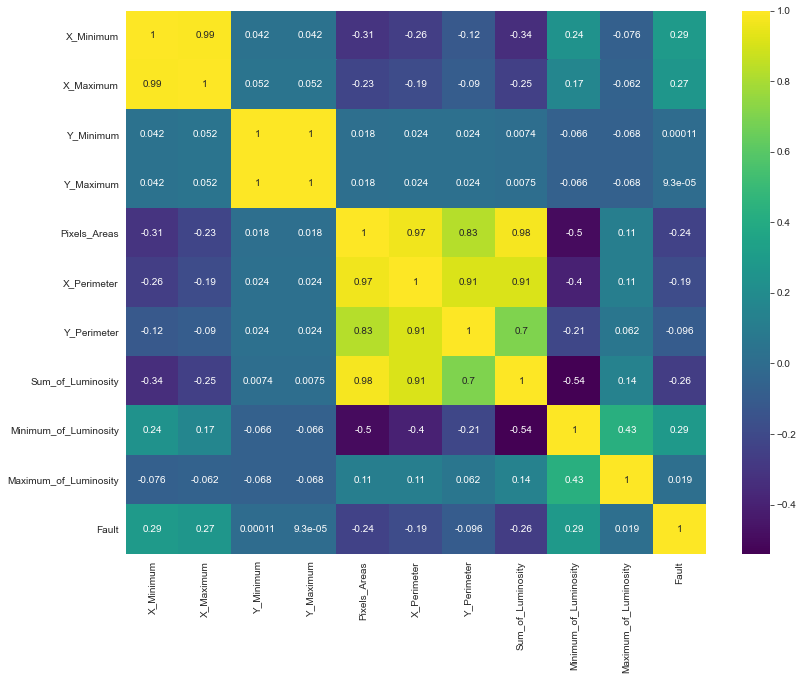

In [333]:
#plotting heatmap using seaborn
plt.figure(figsize=(13,10))
sns.heatmap(steel_data[column_names[[list(range(0,10))+[27]]]].corr(), annot=True, cmap='viridis')
plt.show()

<font size=2.5 color='olive'>__Observation:__
1. Columns 'Y_Minimum', 'Y_maximum' are not at all correlated with the 'Fault' variable. So we are going to drop them from the data as they don't add much value to the prediction.
2. There is _High Correlation_ between <br>
    A. 'X_Minimum', 'X_maximum'. So we are going to keep 'X_Minimum' and drop the other.<br>
    B. 'Pixel_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity'. So we are going to keep 'X_Perimeter'(as it has much collinearity with others) and drop the rest of them.

In [334]:
#Clowning the data into new dataframe
cleaned_steel_data = steel_data

In [335]:
#Columns in 1-10 that needs to be dropped
drop_column1_10 = ['Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Maximum', 'Y_Perimeter', 'Sum_of_Luminosity']
cleaned_steel_data.drop(drop_column1_10, axis=1, inplace=True)

In [336]:
cleaned_steel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Perimeter            1941 non-null   int64  
 2   Minimum_of_Luminosity  1941 non-null   int64  
 3   Maximum_of_Luminosity  1941 non-null   int64  
 4   Length_of_Conveyer     1941 non-null   int64  
 5   TypeOfSteel_A300       1941 non-null   int64  
 6   TypeOfSteel_A400       1941 non-null   int64  
 7   Steel_Plate_Thickness  1941 non-null   int64  
 8   Edges_Index            1941 non-null   float64
 9   Empty_Index            1941 non-null   float64
 10  Square_Index           1941 non-null   float64
 11  Outside_X_Index        1941 non-null   float64
 12  Edges_X_Index          1941 non-null   float64
 13  Edges_Y_Index          1941 non-null   float64
 14  Outside_Global_Index   1941 non-null   float64
 15  LogO

<font size=2.5 color='darkblue'>Columns 11-20

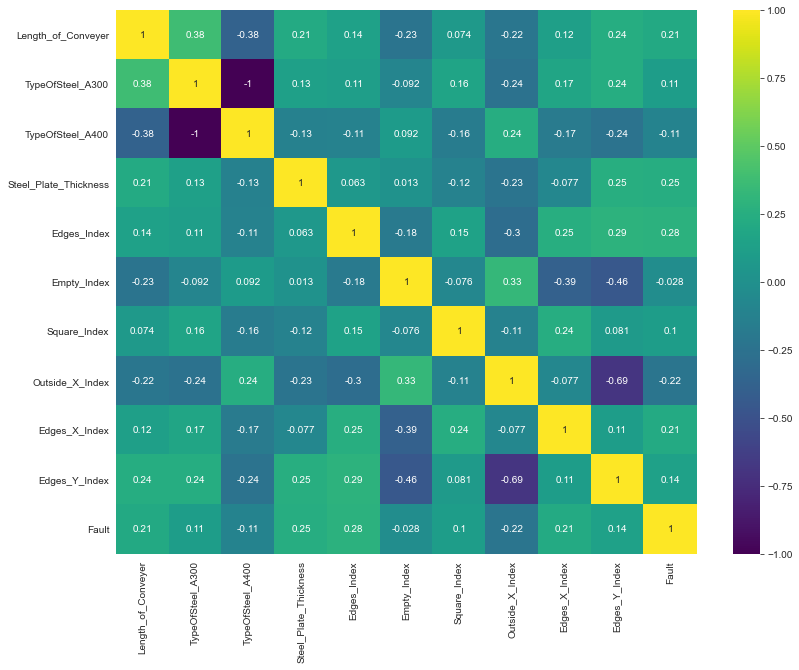

In [337]:
#plotting heatmap using seaborn
plt.figure(figsize=(13,10))
sns.heatmap(steel_data[column_names[[list(range(10,20))+[27]]]].corr(), annot=True, cmap='viridis')
plt.show()

<font size=2.5 color='olive'>__Observation:__
1. There is _High Correlation_ between 'TypeOfSteel_A300', 'TypeOfSteel_A400'. So we are going to keep 'TypeOfSteel_A300' and drop the other.

In [338]:
#Columns in 11-20 that needs to be dropped
cleaned_steel_data.drop('TypeOfSteel_A400', axis=1, inplace=True)

In [339]:
cleaned_steel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Perimeter            1941 non-null   int64  
 2   Minimum_of_Luminosity  1941 non-null   int64  
 3   Maximum_of_Luminosity  1941 non-null   int64  
 4   Length_of_Conveyer     1941 non-null   int64  
 5   TypeOfSteel_A300       1941 non-null   int64  
 6   Steel_Plate_Thickness  1941 non-null   int64  
 7   Edges_Index            1941 non-null   float64
 8   Empty_Index            1941 non-null   float64
 9   Square_Index           1941 non-null   float64
 10  Outside_X_Index        1941 non-null   float64
 11  Edges_X_Index          1941 non-null   float64
 12  Edges_Y_Index          1941 non-null   float64
 13  Outside_Global_Index   1941 non-null   float64
 14  LogOfAreas             1941 non-null   float64
 15  Log_

<font size=2.5 color='darkblue'>Columns 21-27

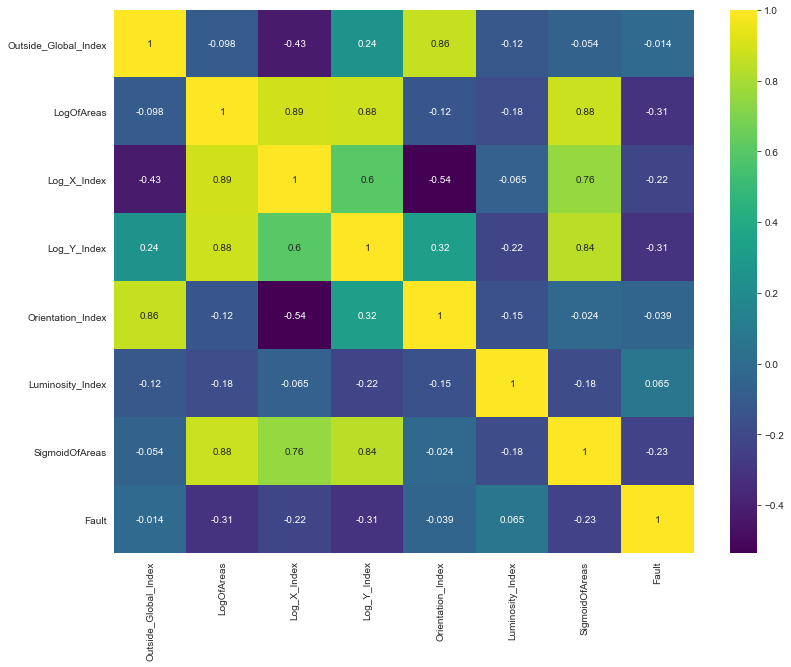

In [340]:
#plotting heatmap using seaborn
plt.figure(figsize=(13,10))
sns.heatmap(steel_data[column_names[[list(range(20,28))]]].corr(), annot=True, cmap='viridis')
plt.show()

<font size=2.5 color='olive'>__Observation:__
1. There is _High Correlation_ between<br>
    A. 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'SigmoidOfAreas'. So we are going to keep 'LogOfAreas'(As it has high collinearity with others) and drop the other.<br>
    B. 'Outside_Global_Index' and 'Orientation_Index'. So we are going to keep 'Outside_Global_Index' and drop the other.

In [341]:
#Columns in 21-26 that needs to be dropped
drop_column21_26 = ['Log_X_Index', 'Log_Y_Index', 'SigmoidOfAreas', 'Orientation_Index']
cleaned_steel_data.drop(drop_column21_26, axis=1, inplace=True)

In [342]:
cleaned_steel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Perimeter            1941 non-null   int64  
 2   Minimum_of_Luminosity  1941 non-null   int64  
 3   Maximum_of_Luminosity  1941 non-null   int64  
 4   Length_of_Conveyer     1941 non-null   int64  
 5   TypeOfSteel_A300       1941 non-null   int64  
 6   Steel_Plate_Thickness  1941 non-null   int64  
 7   Edges_Index            1941 non-null   float64
 8   Empty_Index            1941 non-null   float64
 9   Square_Index           1941 non-null   float64
 10  Outside_X_Index        1941 non-null   float64
 11  Edges_X_Index          1941 non-null   float64
 12  Edges_Y_Index          1941 non-null   float64
 13  Outside_Global_Index   1941 non-null   float64
 14  LogOfAreas             1941 non-null   float64
 15  Lumi

<font size=2.5 color='darkblue'>Plotting heatmap on all the remaining features

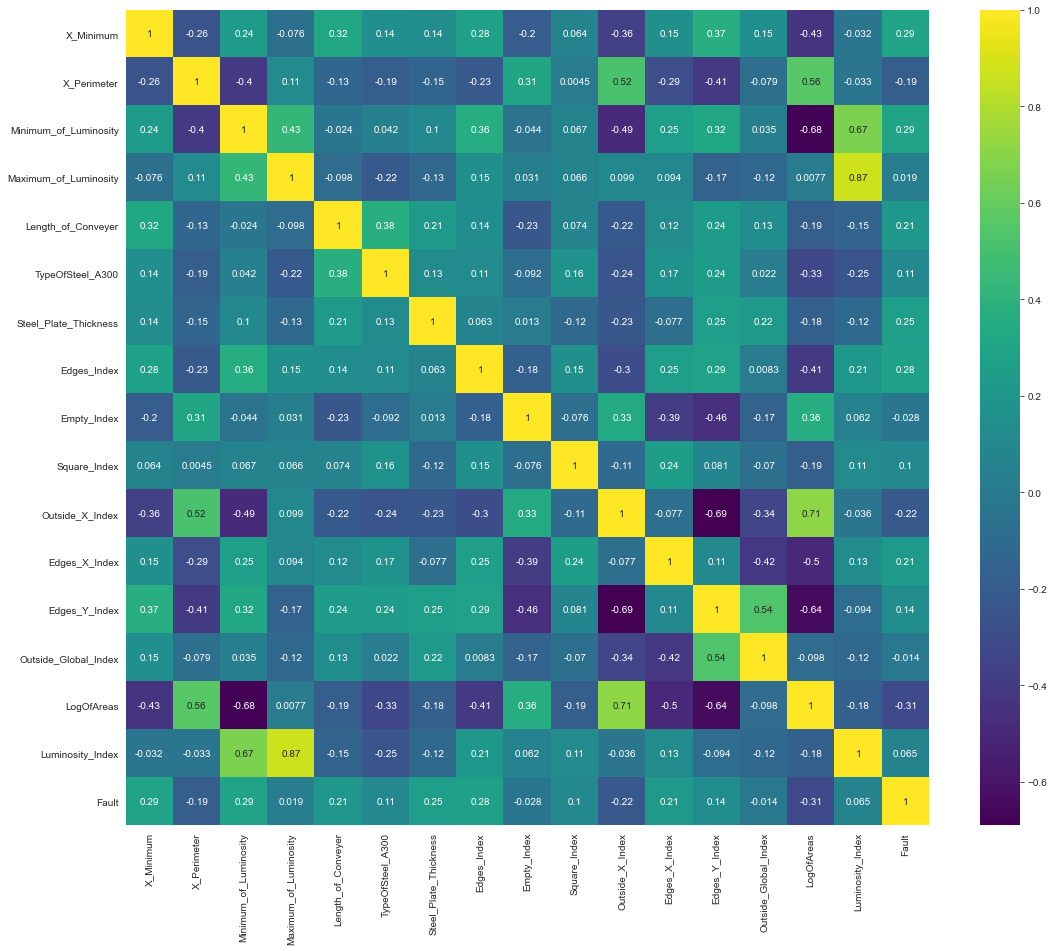

In [343]:
#plotting heatmap using seaborn
plt.figure(figsize=(18,15))
sns.heatmap(cleaned_steel_data.corr(), annot=True, cmap='viridis')
plt.show()

<font size=2.5 color='olive'>__Observation:__
1. There is _High Correlation_ between<br>
    A. 'X_Perimeter' with 'Outside_X_Index'. So we are going to keep 'X_Perimeter and drop the other.<br>
    B. 'Luminosity_Index' with 'Minimum_of_Luminosity', 'Maximum_of_Luminosity'. So we are going to keep 'Luminosity_Index' and drop the others<br>
    C. 'Edges_Y_Index' with 'Log_of_Areas'. So we are going to keep 'Log_of_Areas' and drop the others

In [344]:
#Columns in the cleaned data that needs to be dropped
drop_columns = ['Outside_X_Index', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Edges_Y_Index']
cleaned_steel_data.drop(drop_columns, axis=1, inplace=True)

In [345]:
cleaned_steel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Perimeter            1941 non-null   int64  
 2   Length_of_Conveyer     1941 non-null   int64  
 3   TypeOfSteel_A300       1941 non-null   int64  
 4   Steel_Plate_Thickness  1941 non-null   int64  
 5   Edges_Index            1941 non-null   float64
 6   Empty_Index            1941 non-null   float64
 7   Square_Index           1941 non-null   float64
 8   Edges_X_Index          1941 non-null   float64
 9   Outside_Global_Index   1941 non-null   float64
 10  LogOfAreas             1941 non-null   float64
 11  Luminosity_Index       1941 non-null   float64
 12  Fault                  1941 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 197.3 KB


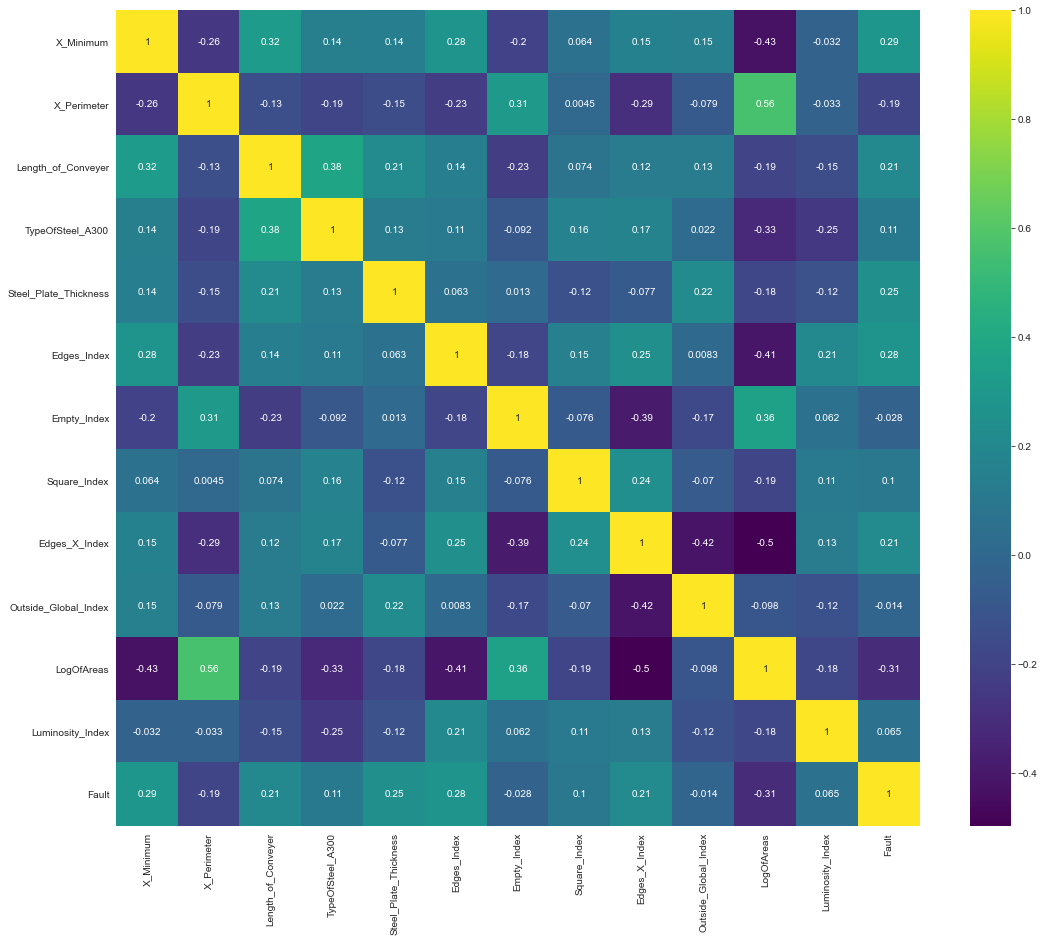

In [346]:
#plotting heatmap using seaborn
plt.figure(figsize=(18,15))
sns.heatmap(cleaned_steel_data.corr(), annot=True, cmap='viridis')
plt.show()

<font size=4 color='Orange'>Building SVM Model

<font size=3.5 color='darkblue'>Splitting the data into train and test

In [347]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_steel_data.drop('Fault',axis=1),
                                                    cleaned_steel_data.Fault.values,
                                                    test_size=0.3, random_state=42)

<font size=2.5 color='darkblue'>Checking the data of all the numerical columns

In [348]:
X_train.describe()

,X_Minimum,X_Perimeter,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Outside_Global_Index,LogOfAreas,Luminosity_Index
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,582.646539,113.864507,1458.421208,0.397644,78.704713,0.335004,0.412845,0.574782,0.610290,0.578424,2.490890,-0.131289
std,519.748356,339.507840,144.847662,0.489591,54.992721,0.299471,0.138295,0.270376,0.241816,0.481720,0.787821,0.144876
min,0.000000,2.000000,1227.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.014400,0.000000,0.301000,-0.860300
25%,57.000000,15.000000,1358.000000,0.000000,40.000000,0.060400,0.315500,0.363600,0.416700,0.000000,1.934500,-0.196075
50%,458.500000,25.000000,1364.000000,0.000000,70.000000,0.231350,0.409450,0.556800,0.636400,1.000000,2.235500,-0.135850
75%,1062.500000,81.000000,1651.500000,1.000000,80.000000,0.579350,0.500000,0.833075,0.800000,1.000000,2.896500,-0.068150
max,1705.000000,10449.000000,1794.000000,1.000000,300.000000,0.995200,0.943900,1.000000,1.000000,1.000000,5.183700,0.591700


<font size=2.5 color='olive'>__Note:__ We need to perform 'Normalization' or 'Standardization' before feeding the data to the model

In [349]:
#Calling the StandardScaler
scalar = StandardScaler()

#Transforing the train data
X_train = scalar.fit_transform(X_train[X_train.columns])

#Transforming the test data
X_test = scalar.fit_transform(X_test[X_test.columns])

#https://stackoverflow.com/questions/49641707/standardize-some-columns-in-python-pandas-dataframe

In [350]:
X_train[0:3]

array([[-0.98092525,  0.20960252, -0.69354383, -0.81249412, -0.70407447,
        -0.75996547,  0.32012064, -0.77876817,  0.60609727, -1.20118935,
         1.39360954, -0.15336504],
       [ 1.08237115, -0.26773455, -0.69354383,  1.23077813,  0.38738094,
        -0.11559262,  0.11902672, -1.37001569, -0.90593662,  0.875469  ,
        -0.17369453, -0.07050487],
       [ 0.90144777, -0.2618415 , -0.72807557, -0.81249412, -0.15834677,
         0.30797648, -1.39207114, -0.82649716, -0.37351866,  0.875469  ,
         0.1055327 , -0.4744482 ]])

<font size=3.5 color='darkblue'>Applying SVM model

In [351]:
#Calling the function
svm_clf = SVC(class_weight='balanced', random_state=42)

#Fitting on train data
svm_clf.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [352]:
#Predicting the test data and storing the results
y_pred = svm_clf.predict(X_test)

print('The score of SVM on test data is:',svm_clf.score(X_test, y_test))

The score of SVM on test data is: 0.7066895368782161


In [380]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(10, 15))
    
    labels = [1,2,3,4,5,6,7]
    
    # representing C in heatmap format
    plt.subplot(3, 1, 1)
    sns.heatmap(C, annot=True, cmap='YlOrBr', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(3, 1, 2)
    sns.heatmap(B, annot=True, cmap='YlOrBr', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(3, 1, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap='YlOrBr', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.tight_layout()
    plt.show()

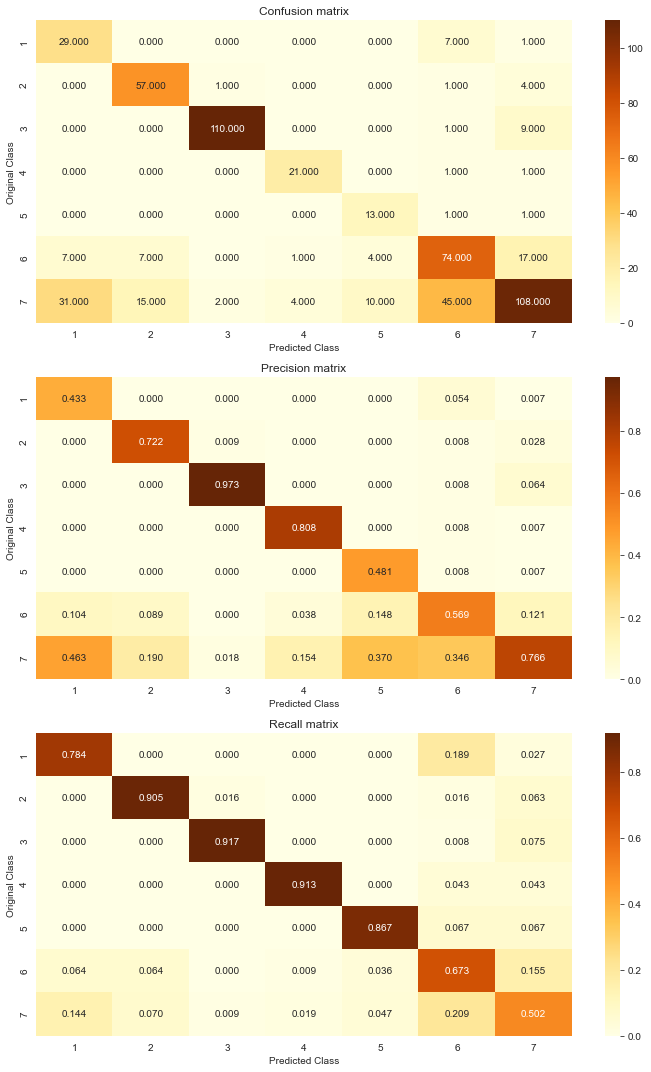

In [381]:
#Plotting the confusion matrix
plot_confusion_matrix(y_test, y_pred)